# Part A
### DOMAIN: Telecom
### CONTEXT: 
A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
### DATA DESCRIPTION: 
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

### PROJECT OBJECTIVE: 
To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

# STEPS AND TASK

# 1. Data Understanding & Exploration:

## A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.


In [1]:
# Import Libraries for Data Pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Import CSV file
df1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
# Show imported dataframe head
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


## B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [3]:
# Import CSV file
df2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
# Show imported dataframe head
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 

In [4]:
# Merge df1 and df2 to single dataframe named customer_data
customer_data = pd.merge(df1,df2,on='customerID')
# Show merged dataframe
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [5]:
# Column names in df1
df1_columns = list(df1.columns)
df1_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity']

In [6]:
# Column names in df2
df2_columns = list(df2.columns)
# Remove 'customerID' from the list as it is repeated
del df2_columns[0]
df2_columns

['OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
# Combine columns from both dataframes
all_columns = df1_columns + df2_columns
all_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
# Column names in customer_data
customer_data_columns = list(customer_data.columns)
customer_data_columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
# Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.
if customer_data_columns == all_columns:
    print("All Columns Incorporated!")
else:
    print("Some columns are missing.")

All Columns Incorporated!


# 2. Data Cleaning & Analysis:
## A. Impute missing/unexpected values in the DataFrame.

In [10]:
# Check datatype of all columns
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Replace empty places with NaN
customer_data = customer_data.replace(' ',np.nan)
# Check for missing values in the merged dataframe
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# There are 11 empty values in the column 'TotalCharges'
# Check for different unexpected categories in other columns
for col in customer_data.columns:
    temp = customer_data[col].value_counts()
    print(temp)

0156-FVPTA    1
8087-LGYHQ    1
8058-INTPH    1
8992-VONJD    1
9931-KGHOA    1
             ..
0301-KOBTQ    1
2676-SSLTO    1
2260-USTRB    1
1345-GKDZZ    1
3249-VHRIP    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

In [13]:
# Drop empty values from the dataframe
customer_data = customer_data.dropna(axis=0).reset_index()
customer_data.isnull().sum()

index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2. Make sure all the variables with continuous values are of ‘Float’ type. [For Example: MonthlyCharges, TotalCharges]

In [14]:
# First, let's convert the columns with an 'object' datatype into categorical variables
for feature in customer_data.columns: # Loop through all columns in the dataframe
    if customer_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        customer_data[feature] = pd.Categorical(customer_data[feature])# Replace strings with an integer
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [15]:
# 'SeniorCitizen' is also a category. Let's change it.
customer_data['SeniorCitizen'] = pd.Categorical(customer_data.SeniorCitizen)
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
Churn               category
dtype: object

In [16]:
# Change datatype of 'TotalCharges' to float
customer_data.TotalCharges = customer_data.TotalCharges.astype(float)
customer_data.dtypes

index                  int64
customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

## C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.

In [60]:
def piechart(dataframe): # Define Function
    df_pie=dataframe.select_dtypes(include=['category']) # Check for categorical columns
    df_pie=df_pie.apply(pd.value_counts).fillna(0)
    df_pie.plot(kind='pie', subplots=True, autopct='%1.1f%%', fontsize=10, layout=(len(df_pie.columns),1), figsize=(80,80));
print('Call piechart(dataframe_name) function to plot pie charts.')

Call piechart(dataframe_name) function to plot pie charts.


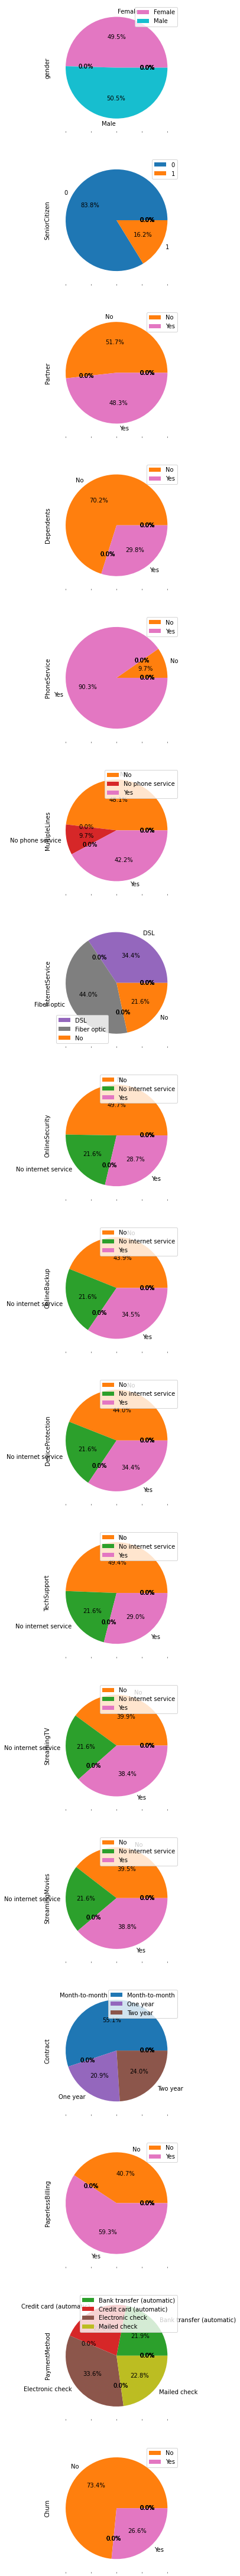

In [61]:
# Call Function and Pass DataDrame
piechart(customer_data)

## D. Share insights for Q2.c.

1. Gender is equally balanced between Male and Female
2. There are lesser senior citizens in the dataset
3. The Partners category is equally distributed between those having partners and those not having partners
4. Most people do not have dependents
5. 90% people have Phone Service
6. Among those having phone service, 42% have multiple lines
7. 44% people have Fiber optic internet service
8. 50% people have Online Security
9. 44% people don't have an online backup
10. 44% people have no device protection
11. 50% people don't get tech support
12. People streaming TV and not streaming TV are almost equal
13. People streaming movies and not streaming movies are almost equal
14. Maximum people (55%) prefer month-to-month contract
15. Maximum people prefer paperless billing
16. 33% people prefer electronic checks to make payments. Other payment methods are almost equally distributed
17. Majority (73%) people did not churn

## E. Encode all the appropriate Categorical features with the best suitable approach.

In [19]:
# Create a dataframe copy
df = customer_data
df.head()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Drop 'index' and 'customerID', 'Churn' columns
df.drop(columns=['index', 'customerID'], inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Independent Variables
X = df.drop(columns=['Churn'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [22]:
# Encode categorical variables
# Using Get Dummies method
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [23]:
# Dependent/Target Variable
Y = df['Churn']
Y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: category
Categories (2, object): ['No', 'Yes']

## F. Split the data into 80% train and 20% test.

In [24]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=.20, random_state=10)

X_train.shape, X_test.shape

((5625, 30), (1407, 30))

## G. Normalize/Standardize the data with the best suitable approach.

In [25]:
# Standardize Training Data
# Import Library
from sklearn.preprocessing import StandardScaler
# Define method
scaler = StandardScaler()
# Perform standardization
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.297499,0.861739,-0.978569,0.980109,-0.443918,-0.967979,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
1,-0.521791,0.840135,-0.233205,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,-0.858594,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,-0.561404,0.822862,-0.531223,1.414779,-0.541665
2,1.560372,1.072790,2.036780,0.980109,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,-0.531223,1.414779,-0.541665
3,1.356239,-1.178976,-0.141853,0.980109,-0.443918,-0.967979,-0.659507,-3.059267,3.059267,-0.858594,...,-0.525166,-0.794595,-0.525166,-0.801159,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
4,-0.399311,0.870048,-0.046720,-1.020295,-0.443918,1.033080,1.516285,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


In [26]:
# Standardize Test Data
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.072697,-1.478104,-0.736393,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,-0.531223,-0.706824,1.846160
1,1.601199,-1.326878,-0.201081,-1.020295,-0.443918,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,1.781249,-1.215271,1.882450,-0.706824,-0.541665
2,-0.766751,-0.193517,-0.677010,-1.020295,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,-0.525166,-0.794595,-0.525166,1.248191,1.947129,-0.561404,-1.215271,1.882450,-0.706824,-0.541665
3,-0.480964,-1.494722,-0.834621,0.980109,-0.443918,-0.967979,-0.659507,0.326876,-0.326876,-0.858594,...,1.904159,-0.794595,1.904159,-0.801159,-0.513577,-0.561404,0.822862,-0.531223,-0.706824,1.846160
4,1.601199,0.637393,1.691601,-1.020295,2.252668,1.033080,-0.659507,0.326876,-0.326876,1.164695,...,-0.525166,1.258503,-0.525166,1.248191,-0.513577,1.781249,0.822862,1.882450,-0.706824,-0.541665


# 3. Model building and Improvement:
## A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [27]:
# Import XGBoost Library
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(normalized_x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

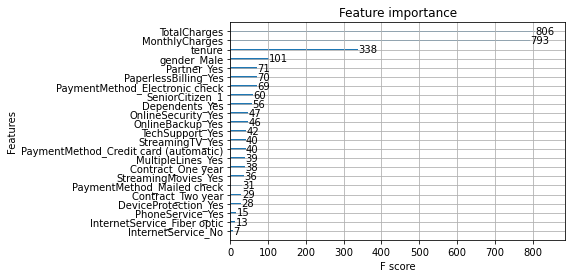

In [28]:
# Feature Importance Plot
xgb.plot_importance(xgb_model);

In [29]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

y_pred = xgb_model.predict(normalized_x_test)

# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[926 120]
 [160 201]]


In [30]:
# predict the target on the train dataset
predict_train = xgb_model.predict(normalized_x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset :  0.9377777777777778


In [31]:
# predict the target on the test dataset
predict_test = xgb_model.predict(normalized_x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset :  0.8009950248756219


## B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

In [32]:
# Early Stopping

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1, eval_metric="auc")

xgb_model.fit(normalized_x_train, y_train, early_stopping_rounds=10, eval_set=[(normalized_x_test, y_test)])

y_pred = xgb_model.predict(normalized_x_test)

accuracy_score(y_test, y_pred)

[0]	validation_0-auc:0.83705
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.84753
[2]	validation_0-auc:0.85023
[3]	validation_0-auc:0.85423
[4]	validation_0-auc:0.85495
[5]	validation_0-auc:0.85637
[6]	validation_0-auc:0.85517
[7]	validation_0-auc:0.85617
[8]	validation_0-auc:0.85564
[9]	validation_0-auc:0.85580
[10]	validation_0-auc:0.85515
[11]	validation_0-auc:0.85422
[12]	validation_0-auc:0.85310
[13]	validation_0-auc:0.85284
[14]	validation_0-auc:0.85223
[15]	validation_0-auc:0.85210
Stopping. Best iteration:
[5]	validation_0-auc:0.85637



0.8088130774697939

In [33]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.85637, best iteration: 5, best ntree limit 6


In [34]:
# Print Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[924 122]
 [147 214]]


In [35]:
# predict the target on the train dataset
predict_train = xgb_model.predict(normalized_x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset :  0.8183111111111111


In [36]:
# predict the target on the test dataset
predict_test = xgb_model.predict(normalized_x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset :  0.8088130774697939


In [37]:
# Tune XGBoost

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1, 
 learning_rate =0.01,
 n_estimators=100,
 max_depth=4,
 min_child_weight=3,
 gamma=0,
 subsample=0.9,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1)

# Fit the Model
xgb_model.fit(normalized_x_train, y_train)

# predict the target on the train dataset
predict_train = xgb_model.predict(normalized_x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = xgb_model.predict(normalized_x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

# Print Confusion Matrix
print(confusion_matrix(y_test, predict_test))


Target on train data ['Yes' 'No' 'No' ... 'No' 'Yes' 'No']

accuracy_score on train dataset :  0.7992888888888889

Target on test data ['No' 'No' 'No' ... 'No' 'No' 'No']

accuracy_score on test dataset :  0.8002842928216063
[[943 103]
 [178 183]]


# Part B
### • DOMAIN: IT
### • CONTEXT: 
The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.
### • PROJECT OBJECTIVE: 
Build a machine learning workflow that will run autonomously with the csv file and return best performing model.
### • STEPS AND TASK:

1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
2. Create separate functions for various purposes.
3. Various base models should be trained to select the best performing model.
4. Pickle file should be saved for the best performing model.

Include best coding practices in the code:

• Modularization

• Maintainability

• Well commented code etc.

Please Note:

Here, if you need to perform some research to build a workflow. If you could, very well done! If not, please follow below instructions:

1. Create separate function fo every step individually.
For Example: Separate function to remove null values, separate function for normalization etc.
On top of it, if you could build some rule based logic, you’ll gain better experience.
2. Once you are done with building smaller functions, you can group similar functions into another function to proceed with.
For Example: create a function ‘preprocessing_’ and call all the preprocessing related functions within that function.
3. Once done with this, Stack all the functions sequentially within ‘main’ function to conclude.
4. Here, knowledge and skills required are of Supervised Learning and Python module only.
5. By building function modules in workflows, you will start gaining industry best practices as you go further in the AIML program else only marks are gained with
traditional approach of programming.
6. If this project is solved by traditional approach, evaluation will be done out of 20 Marks. And if industry approach is followed successfully, bonus of 10 marks
will awarded and evaluation will be done out of 30 Marks.

#cust = pd.read_csv('customer_data.csv')# Read CSV file
#cust.head() # Display head

In [82]:
# Function to Import CSV file
def importcsv():
    print('Input filename along with .csv extension:')
    print(' ')
    filename = input('') # Ask for filename.csv input from user
    print('File '+filename+' imported successfully')
    print(' ')
    data = pd.read_csv(filename) # Create Pandas dataframe from imported file
    return data

# Call Function
data = importcsv()
data.head()

Input filename along with .csv extension:
 
customer_data.csv
File customer_data.csv imported successfully
 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#cust = cust.replace(' ',np.nan) # Replace empty cells with NaN
#cust = cust.dropna(axis=0).reset_index() # Remove rows that have NaN values
#cust.isnull().sum()

In [83]:
# Function for Data Cleaning
def data_clean(x):
    # Replace empty places with NaN
    x = x.replace(' ',np.nan)
    x = x.dropna(axis=0).reset_index() # Remove rows that have NaN values
    return x

# Call Function
data = data_clean(data)
data.isnull().sum()

index               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#'SeniorCitizen' is also a category. Let's change it.
#cust['SeniorCitizen'] = pd.Categorical(cust.SeniorCitizen)
#Change datatype of 'TotalCharges' to float
#cust.TotalCharges = cust.TotalCharges.astype(float)
#cust.dtypes

In [84]:
# Function for Changing datatypes
def change_dtype(x):
    # 'SeniorCitizen' is also a category. Let's change it.
    x['SeniorCitizen'] = pd.Categorical(x.SeniorCitizen)
    # Change datatype of 'TotalCharges' to float
    x.TotalCharges = x.TotalCharges.astype(float)
    return x

# Call Function
data = change_dtype(data)
data.dtypes

index                  int64
customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

#Drop columns not important for modelling
#cust_upd = cust.drop(columns=['level_0','index','customerID'])
#cust_upd

In [85]:
# Function to prepare dataset for modelling
def data_prep(x):
    x = x.drop(columns=['index','customerID'])# Drop columns not important for modelling
    x_new = x.drop(columns=['Churn'])# Independent Variables
    x_new = pd.get_dummies(x_new, prefix_sep='_', drop_first=True)# Encode categorical variables
    y_new = x['Churn']
    # splitting data into training and test set for independent attributes
    X_train, X_test, y_train, y_test =train_test_split(x_new,y_new, test_size=.20, random_state=1)
    # Perform standardization
    normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
    normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    return normalized_x_train, normalized_x_test, y_train, y_test

# Call Function
normalized_x_train, normalized_x_test, y_train, y_test = data_prep(data)
normalized_x_train.shape, normalized_x_test.shape

((5625, 30), (1407, 30))

In [86]:
def pre_process():
    data = importcsv()
    data = data_clean(data)
    data = change_dtype(data)
    normalized_x_train, normalized_x_test, y_train, y_test = data_prep(data)
    return normalized_x_train, normalized_x_test, y_train, y_test
# Call Function
normalized_x_train, normalized_x_test, y_train, y_test = pre_process()
normalized_x_train.shape, normalized_x_test.shape

Input filename along with .csv extension:
 
customer_data.csv
File customer_data.csv imported successfully
 


((5625, 30), (1407, 30))

#Independent Variables
#X_new = cust_upd.drop(columns=['Churn'])
#X_new.head()

#Encode categorical variables
#Using Get Dummies method
#X_new = pd.get_dummies(X_new, prefix_sep='_', drop_first=True)
#X_new.head()

#Dependent/Target Variable
#Y_new = cust_upd['Churn']
#Y_new

#splitting data into training and test set for independent attributes

#X_train, X_test, y_train, y_test =train_test_split(X_new,Y_new, test_size=.20, random_state=2)

#X_train.shape, X_test.shape

#Perform standardization
#normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
#normalized_x_train.head()

#Standardize Test Data
#normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
#normalized_x_test.head()

In [89]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data

    train_acc = model.score(X_train,y_train) # training accuracy score
    
    test_acc = model.score(X_test,y_test) # test accuracy score
    
    end = time.time()  #note the end time
    
    duration = end - start  # calculate the total duration
    
    return train_acc, test_acc, duration, pred  # return all the metrics along with predictions
def run_model():
    import time
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    
    logreg = LogisticRegression()
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    svc_model = SVC()
    dTree = DecisionTreeClassifier()
    xgb_model = xgb.XGBClassifier()
    result = {}   # Create an empty dictionary to later use to store metrics of each of the models
    # putting all 5 models in a for loop and appending the results of each of the models to the 'result' dictionary
    for model, name  in zip([logreg, nb, knn, svc_model, dTree, xgb_model], 
                        ['Logistic Regression','Naive Bayes','KNN','SVC','Decision Tree','XGBoost']):
        result[name] = fit_n_print(model,normalized_x_train, normalized_x_test, y_train, y_test)  
    # store all the metrics in the result dict, with name as key
    result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['train_acc', 'test_acc', 'duration'],
                      index= result.keys())   # use the model names as index
    result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'
    return result1
run_model()
print('Model Functions run successfully!')

Model Functions run successfully!


<ipython-input-89-b9a83241603d>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary


In [90]:
def main_func():
    normalized_x_train, normalized_x_test, y_train, y_test = pre_process()
    final = run_model()
    return final

# Call Main Function
main_func()

Input filename along with .csv extension:
 
customer_data.csv
File customer_data.csv imported successfully
 


<ipython-input-89-b9a83241603d>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary


,train_acc,test_acc,duration
Model,,,
Logistic Regression,0.806933,0.796731,0.082924
Naive Bayes,0.653333,0.657427,0.066078
KNN,0.831111,0.746269,1.733204
SVC,0.816,0.793888,4.23945
Decision Tree,0.997689,0.726368,0.04883
XGBoost,0.928178,0.790334,0.705804


In [93]:
# creating the model object
model = LogisticRegression()

# Fitting Model
model.fit(normalized_x_train,y_train)

LogisticRegression()

In [95]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)
    
print("File saved successfully!")

File saved successfully!


#Logistic Regression Model
#from sklearn.linear_model import LogisticRegression
#Fit the model on train
#logreg = LogisticRegression(solver="liblinear")
#logreg.fit(normalized_x_train, y_train)
#Predict on test
#y_predict = logreg.predict(normalized_x_test)

#Print Performance
#from sklearn import metrics
#from sklearn.metrics import classification_report
#print('Training Performance',logreg.score(normalized_x_train, y_train))
#print('Test Performance',logreg.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#Naive Bayes Model
#from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

#create the model
#nb = GaussianNB()

#nb.fit(normalized_x_train, y_train)

#Predict on test
#y_predict = nb.predict(normalized_x_test)

#Print Performance
#print('Training Performance',nb.score(normalized_x_train, y_train))
#print('Test Performance',nb.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#KNN Model
#Import KNN Classifier from sklearn
#from sklearn.neighbors import KNeighborsClassifier

#creating odd list of K for KNN
#myList = list(range(1,50))

#subsetting just the odd ones
#neighbors = list(filter(lambda x: x % 2 != 0, myList))

#Check for optimal value of k
#kscores = []
#for i in neighbors:
    #knn = KNeighborsClassifier(n_neighbors = i)
    #knn.fit(normalized_x_train, y_train)
    # predict the response
    #y_pred = knn.predict(normalized_x_test)
    # evaluate accuracy
    #s = accuracy_score(y_test,y_pred)
    #kscores.append(s)
#plt.plot(neighbors, kscores, 'o-')   
#plt.xticks(neighbors)
#plt.show()

#changing to misclassification error
#MSE = [1 - x for x in kscores]

#determining best k
#optimal_k = neighbors[MSE.index(min(MSE))]
#print("The optimal number of neighbors is %d" % optimal_k)

#Use k=optimal_k as the final model for prediction
#knn = KNeighborsClassifier(n_neighbors = optimal_k)

#fitting the model
#knn.fit(normalized_x_train, y_train)

#predict the response
#y_predict = knn.predict(normalized_x_test)

#Print Performance
#print('Training Performance',knn.score(normalized_x_train, y_train))
#print('Test Performance',knn.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#SVM Model
#from sklearn.svm import SVC

#Building a Support Vector Machine on train data
#kernel_func = ['linear','rbf','poly','sigmoid']
#svc_score = []
#for func in kernel_func:
    #svc_model = SVC(kernel=func)
    #svc_model.fit(normalized_x_train, y_train)
    
    # predict the response
    #y_predict = svc_model.predict(normalized_x_test)
    # Print Performance
    #print('Kernel Function Used: ',func)
    #print('Training Performance',svc_model.score(normalized_x_train, y_train))
    #print('Test Performance',svc_model.score(normalized_x_test, y_test))
    #s = svc_model.score(normalized_x_test, y_test)
    #svc_score.append(s)
    #print('------------------------------------------------------------------')

#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#Decision Tree Model
#from sklearn.tree import DecisionTreeClassifier

#for depth in range(1,6):
    #dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = depth, random_state=1)
    #dTree.fit(normalized_x_train, y_train)
    
    # Predict on test
    #y_predict = dTree.predict(normalized_x_test)
    
    # Print Performance
    #print('Max Depth= ',depth)
    #print('Training Performance',dTree.score(normalized_x_train, y_train))
    #print('Test Performance',dTree.score(normalized_x_test, y_test))
    #print('------------------------------------------------------------------')

#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))    

#Print Feature Importances
#print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = normalized_x_train.columns))

#Ensemble Learning - Bagging Classifier Model

#from sklearn.ensemble import BaggingClassifier

#bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

#bgcl = bgcl.fit(normalized_x_train, y_train)

#Predict on test
#y_predict = bgcl.predict(normalized_x_test)
    
#Print Performance
#print('Training Performance',bgcl.score(normalized_x_train, y_train))
#print('Test Performance',bgcl.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#Ensemble Learning - AdaBoosting Model

#from sklearn.ensemble import AdaBoostClassifier

#abcl = AdaBoostClassifier(n_estimators=50, random_state=1)

#abcl = abcl.fit(normalized_x_train, y_train)

#Predict on test
#y_predict = abcl.predict(normalized_x_test)
    
#Print Performance
#print('Training Performance',abcl.score(normalized_x_train, y_train))
#print('Test Performance',abcl.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#Ensemble Learning - GradientBoost Model
#from sklearn.ensemble import GradientBoostingClassifier

#gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
#gbcl = gbcl.fit(normalized_x_train, y_train)

#Predict on test
#y_predict = gbcl.predict(normalized_x_test)
    
#Print Performance
#print('Training Performance',gbcl.score(normalized_x_train, y_train))
#print('Test Performance',gbcl.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#Ensemble RandomForest Classifier Model

#from sklearn.ensemble import RandomForestClassifier

#rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)

#rfcl = rfcl.fit(normalized_x_train, y_train)

#Predict on test
#y_predict = rfcl.predict(normalized_x_test)
    
#Print Performance
#print('Training Performance',rfcl.score(normalized_x_train, y_train))
#print('Test Performance',rfcl.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))

#XGBoost Classifier Model
#xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1, 
 #learning_rate =0.01,
 #n_estimators=100,
 #max_depth=4,
 #min_child_weight=3,
 #gamma=0,
 #subsample=0.9,
 #colsample_bytree=0.8,
 #nthread=4,
 #scale_pos_weight=1)

#Fit the Model
#xgb_model.fit(normalized_x_train, y_train)

#Predict on test
#y_predict = xgb_model.predict(normalized_x_test)
    
#Print Performance
#print('Training Performance',xgb_model.score(normalized_x_train, y_train))
#print('Test Performance',xgb_model.score(normalized_x_test, y_test))
#print(confusion_matrix(y_test, y_predict))
#print(classification_report(y_test, y_predict, target_names=['Yes','No']))